<a href="https://colab.research.google.com/github/narpat78/Image-Classification-using-CNN/blob/main/CIFAR_10_Image_Classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIFAR-10 Image Classification

### Loading Required Packages

In [1]:
# loading the required libraries
import warnings
warnings.filterwarnings('ignore')
import cv2
import numpy as np
import urllib.request
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras.datasets import cifar10
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Dense, Flatten, Dropout, Activation
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from keras.regularizers import l2

### Loading the Dataset using Keras Datasets

In [2]:
# loading the train and test split
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 9s 0us/step


In [3]:
# analyzing the shape of the loaded sets
print('X_train Shape: ', X_train.shape)
print('y_train Shape: ', y_train.shape)
print('\nX_test Shape: ', X_test.shape)
print('\y_test Shape: ', y_test.shape)

X_train Shape:  (50000, 32, 32, 3)
y_train Shape:  (50000, 1)

X_test Shape:  (10000, 32, 32, 3)
\y_test Shape:  (10000, 1)


In [4]:
# training and validation split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [5]:
# analyzing the shape of training and validation sets
print('New Training sets:\nX_train Shape: ', X_train.shape)
print('y_train Shape: ', y_train.shape)
print('\nValidation sets:\nX_valid Shape: ', X_valid.shape)
print('y_valid Shape: ', y_valid.shape)

New Training sets:
X_train Shape:  (45000, 32, 32, 3)
y_train Shape:  (45000, 1)

Validation sets:
X_valid Shape:  (5000, 32, 32, 3)
y_valid Shape:  (5000, 1)


### Small Overview of the Dataset and Different Classes

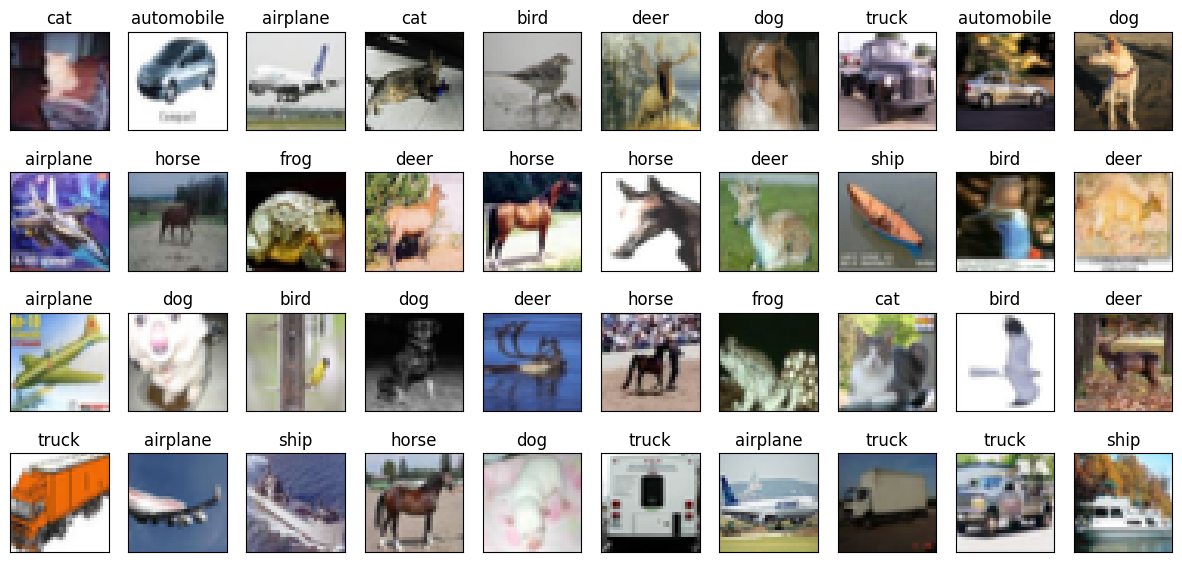

In [6]:
# CIFAR-10 classes
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# displaying some training examples
plt.figure(figsize=(15,7))
# looping over the first 40 images
for i in range(40):
    # subplot for each image
    plt.subplot(4, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    # displaying the image
    plt.imshow(X_train[i])
    # setting the label as the title
    plt.title(class_names[y_train[i][0]], fontsize=12)

# displaying the figure
plt.show()

#### Data/Image Preprocessing

In [7]:
# converting the dtype to float32
X_train = X_train.astype('float32')
X_valid = X_valid.astype('float32')
X_test  = X_test.astype('float32')

In [8]:
# Normalize the data
X_train = X_train/255
X_test  = X_test/255
X_valid = X_valid/255

### Building an Initial Model

In [9]:
# building the CNN model
weight_decay = 0.003

model = Sequential()

# first block
model.add(Conv2D(32, (3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay), input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(32, (3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

# second block
model.add(Conv2D(64, (3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64, (3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

# third block
model.add(Conv2D(128, (3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(128, (3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

# fourth block
model.add(Conv2D(256, (3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(256, (3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

# fully connected layers
model.add(Flatten())
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

In [10]:
# model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 8, 8, 128)           │              

 Total params: 1,441,066 (5.50 MB)

 Trainable params: 1,439,146 (5.49 MB)

 Non-trainable params: 1,920 (7.50 KB)

### Compiling and Training Model

In [11]:
# callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True, verbose=1)

In [12]:
# compiling the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# training the model
history = model.fit(X_train, y_train, batch_size=64, epochs=300, validation_data=(X_valid, y_valid),
                    callbacks=[reduce_lr, early_stopping], verbose=0)
print('Training Completed.')

Epoch 184: early stopping
Restoring model weights from the end of the best epoch: 164.
Training Completed.


### Visualizing the Learning and Loss Curves

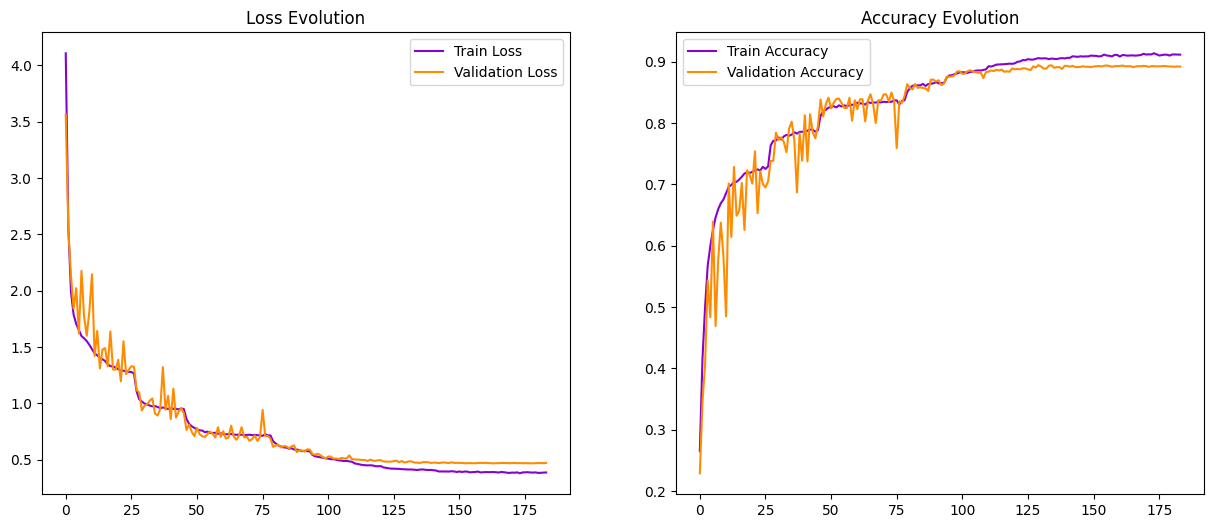

In [13]:
# plotting loss and accuracy
plt.figure(figsize=(15,6))

# plotting the training and validation loss
plt.subplot(1, 2, 1)
plt.plot(model.history.history['loss'], label='Train Loss', color='#8502d1')
plt.plot(model.history.history['val_loss'], label='Validation Loss', color='darkorange')
plt.legend()
plt.title('Loss Evolution')

# plotting the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(model.history.history['accuracy'], label='Train Accuracy', color='#8502d1')
plt.plot(model.history.history['val_accuracy'], label='Validation Accuracy', color='darkorange')
plt.legend()
plt.title('Accuracy Evolution')

plt.show()

### Evaluating Model on Test set

In [14]:
# evaluating model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy:', test_acc)
print('Test Loss:    ', test_loss)

Test Accuracy: 0.8848999738693237
Test Loss:     0.4921797215938568


### Classification of Out-of-Dataset Image

#### 1st Image

In [16]:
# loading image
url = "https://raw.githubusercontent.com/narpat78/Image-Classification-using-CNN/main/images/image1.jpg"
resp = urllib.request.urlopen(url)
image = np.asarray(bytearray(resp.read()), dtype="uint8")
image = cv2.imdecode(image, cv2.IMREAD_UNCHANGED)
# converting the image from BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

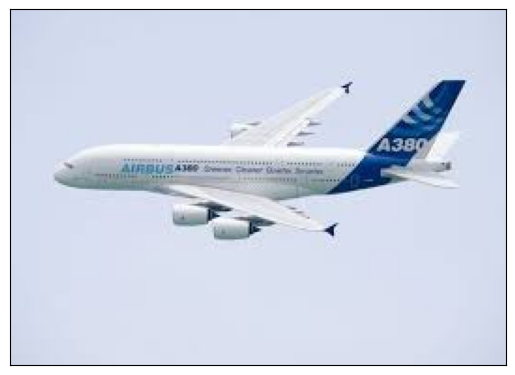

In [17]:
# displaying image
plt.imshow(image)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()

In [18]:
# resizing image
image = cv2.resize(image, (32,32))
# normalizing the image
image = image/255
# adding an extra dimension because the model expects a batch of images
image = image.reshape((1, 32, 32, 3))

In [19]:
# making prediction
prediction = model.predict(image)
predicted_class = prediction.argmax()
print('Predicted class: ', class_names[predicted_class])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted class:  airplane


#### 2nd Image

In [20]:
# loading image
url = "https://raw.githubusercontent.com/narpat78/Image-Classification-using-CNN/main/images/image2.jpg"
resp = urllib.request.urlopen(url)
image = np.asarray(bytearray(resp.read()), dtype="uint8")
image = cv2.imdecode(image, cv2.IMREAD_UNCHANGED)
# converting the image from BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

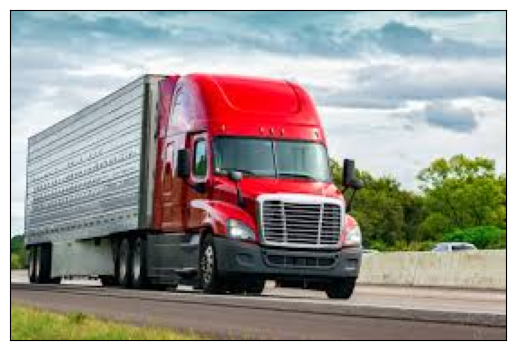

In [21]:
# displaying image
plt.imshow(image)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()

In [22]:
# resizing image
image = cv2.resize(image, (32,32))
# normalizing the image
image = image/255
# adding an extra dimension because the model expects a batch of images
image = image.reshape((1, 32, 32, 3))

In [23]:
# making prediction
prediction = model.predict(image)
predicted_class = prediction.argmax()
print('Predicted class: ', class_names[predicted_class])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted class:  truck


#### 3rd Image

In [24]:
# loading image
url = "https://raw.githubusercontent.com/narpat78/Image-Classification-using-CNN/main/images/image3.jpg"
resp = urllib.request.urlopen(url)
image = np.asarray(bytearray(resp.read()), dtype="uint8")
image = cv2.imdecode(image, cv2.IMREAD_UNCHANGED)
# converting the image from BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

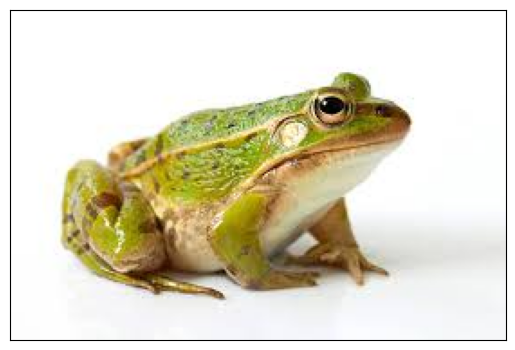

In [25]:
# displaying image
plt.imshow(image)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()

In [26]:
# resizing image
image = cv2.resize(image, (32,32))
# normalizing the image
image = image/255
# adding an extra dimension because the model expects a batch of images
image = image.reshape((1, 32, 32, 3))

In [27]:
# making prediction
prediction = model.predict(image)
predicted_class = prediction.argmax()
print('Predicted class: ', class_names[predicted_class])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted class:  frog


#### 4th Image

In [28]:
# loading image
url = "https://raw.githubusercontent.com/narpat78/Image-Classification-using-CNN/main/images/image4.jpg"
resp = urllib.request.urlopen(url)
image = np.asarray(bytearray(resp.read()), dtype="uint8")
image = cv2.imdecode(image, cv2.IMREAD_UNCHANGED)
# converting the image from BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

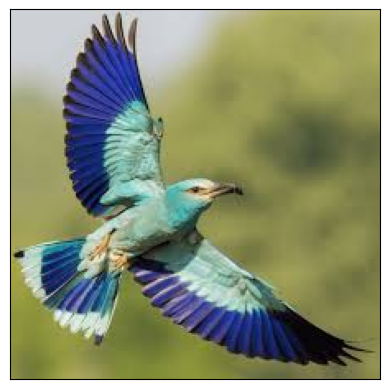

In [29]:
# displaying image
plt.imshow(image)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()

In [30]:
# resizing image
image = cv2.resize(image, (32,32))
# normalizing the image
image = image/255
# adding an extra dimension because the model expects a batch of images
image = image.reshape((1, 32, 32, 3))

In [31]:
# making prediction
prediction = model.predict(image)
predicted_class = prediction.argmax()
print('Predicted class: ', class_names[predicted_class])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted class:  bird


#### 5th Image

In [32]:
# loading image
url = "https://raw.githubusercontent.com/narpat78/Image-Classification-using-CNN/main/images/image5.jpg"
resp = urllib.request.urlopen(url)
image = np.asarray(bytearray(resp.read()), dtype="uint8")
image = cv2.imdecode(image, cv2.IMREAD_UNCHANGED)
# converting the image from BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

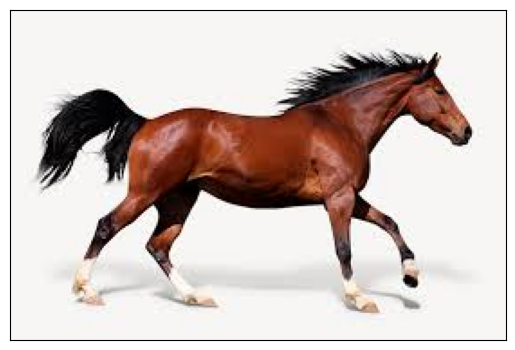

In [33]:
# displaying image
plt.imshow(image)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()

In [34]:
# resizing image
image = cv2.resize(image, (32,32))
# normalizing the image
image = image/255
# adding an extra dimension because the model expects a batch of images
image = image.reshape((1, 32, 32, 3))

In [35]:
# making prediction
prediction = model.predict(image)
predicted_class = prediction.argmax()
print('Predicted class: ', class_names[predicted_class])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted class:  horse
